In [1]:
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
import seaborn as sns # pip install seaborn
import numpy as np

dengue = pd.read_csv('Casos_de_Dengue_Caqueta.csv')
# Visualización de los datos
print(dengue.head())



   ID  NombreEstacion  FECHA REPORTE MES REPORTE  SEMANA EPIDEMIOLOGICA  EDAD  \
0   1             210           2018       ENERO                      1    34   
1   2             210           2018       ENERO                      1    28   
2   3             210           2018       ENERO                      2    20   
3   4             210           2018       ENERO                      2     1   
4   5             210           2018       ENERO                      2     8   

  UNI_MED NACIONALIDAD       SEXO    REGIMEN DE SALUD       PERTENECIA ETNICA  \
0    AÑOS     COLOMBIA   FEMENINO  331.65555555555557  SIN PERTENENCIA ETNICA   
1    AÑOS     COLOMBIA  MASCULINO          SUBSIDIADO  SIN PERTENENCIA ETNICA   
2    AÑOS     COLOMBIA   FEMENINO          SUBSIDIADO  SIN PERTENENCIA ETNICA   
3    AÑOS     COLOMBIA   FEMENINO        CONTRIBUTIVO  SIN PERTENENCIA ETNICA   
4    AÑOS     COLOMBIA   FEMENINO          SUBSIDIADO  SIN PERTENENCIA ETNICA   

                          

In [2]:
# Imprimir el encabezado del apartado de lluvias.
lluvia = pd.read_csv('Precipitacion.csv',sep=None, engine='python', encoding='latin-1', on_bad_lines='skip')
print(lluvia.head())

   CodigoEstacion         NombreEstacion       Variable  \
0        44135010  ARARACUARA [44135010]  PRECIPITACION   
1        44135010  ARARACUARA [44135010]  PRECIPITACION   
2        44135010  ARARACUARA [44135010]  PRECIPITACION   
3        44135010  ARARACUARA [44135010]  PRECIPITACION   
4        44135010  ARARACUARA [44135010]  PRECIPITACION   

                     Parametro           Fecha Unidad  Valor NivelAprobacion  
0  Precipitacion total mensual  1/01/2018 0:00     mm  241.3      Definitivo  
1  Precipitacion total mensual  1/02/2018 0:00     mm   62.1      Definitivo  
2  Precipitacion total mensual  1/03/2018 0:00     mm  356.6      Definitivo  
3  Precipitacion total mensual  1/04/2018 0:00     mm  394.4      Definitivo  
4  Precipitacion total mensual  1/05/2018 0:00     mm  483.8      Definitivo  


In [3]:
# Imprimir los datos nulos del sistema.
print(dengue.isnull().sum())
print(lluvia.isnull().sum())

ID                       0
NombreEstacion           0
FECHA REPORTE            0
MES REPORTE              0
SEMANA EPIDEMIOLOGICA    0
EDAD                     0
UNI_MED                  0
NACIONALIDAD             0
SEXO                     0
REGIMEN DE SALUD         0
PERTENECIA ETNICA        0
NOM UPGD                 0
NOMBRE DEL EVENTO        0
PAIS REPORTE             0
DEPARTAMENTO REPORTE     0
MUNICIPIO REPORTE        0
dtype: int64
CodigoEstacion     0
NombreEstacion     0
Variable           0
Parametro          0
Fecha              0
Unidad             0
Valor              0
NivelAprobacion    0
dtype: int64


In [4]:
# Identificar edades inconsistentes
# consi# deremos que las edades válidas están entre 18 y 90
edades_inconsistentes=dengue[(dengue['EDAD']<1) | (dengue['EDAD']>100)|(dengue['EDAD'].isnull())]
print(edades_inconsistentes)

Empty DataFrame
Columns: [ID, NombreEstacion, FECHA REPORTE, MES REPORTE, SEMANA EPIDEMIOLOGICA, EDAD, UNI_MED, NACIONALIDAD, SEXO, REGIMEN DE SALUD, PERTENECIA ETNICA, NOM UPGD, NOMBRE DEL EVENTO, PAIS REPORTE, DEPARTAMENTO REPORTE, MUNICIPIO REPORTE]
Index: []


In [5]:
# Identificar inconsistencias en los nombres de ciudades
# ver una lista única de las ciudades ingresadas para detectar variaciones
municipios_unicos=dengue['MUNICIPIO REPORTE'].dropna().unique()
print("\n municipios con casos de Dengue")
print(municipios_unicos)
municipios_monitoreados = lluvia['NombreEstacion'].dropna().unique()
print("\n municipios monitoriados")
print(municipios_monitoreados)


 municipios con casos de Dengue
['FLORENCIA' 'SAN VICENTE DEL CAGUAN' 'CAQUETA. MUNICIPIO DESCONOCIDO'
 'CARTAGENA DELCHAIRA' 'EL PAUJIL' 'SOLANO' 'CURILLO' 'PUERTO RICO'
 'SAN JOSE DEL FRAGUA' 'MORELIA' 'SOLITA' 'BELEN DE LOS ANDAQUIES'
 'LA MONTANITA' 'EL DONCELLO' 'ALBANIA' 'VALPARAISO' 'MILAN']

 municipios monitoriados
['ARARACUARA [44135010]' 'BELEN DE ANDAQUIES [44040020]'
 'CARTAGENA D CHAIRA [46040010]' 'CORDOBA [44100010]' 'CUEMANI [44140020]'
 'ESTRECHOS LOS [44127010]' 'LARANDIA [44030060]' 'MACAGUAL [44035030]'
 'MAGUARE - AUT [46035010]' 'MARACAIBO [4403000112]']


In [6]:
# Encontramos ahora que existen datos que no tienen definido el dato de
# que es un dato fundamental para la data por lo que tambien eliminamos las filas
# que tienen un dado de 'CAQUETA. MUNICIPIO DESCONOCIDO'ArithmeticError
# Eliminamos las filas donde 'MUNICIPIO REPORTE' es 'CAQUETA. MUNICIPIO DESCONOCIDO'
dengue = dengue[dengue['MUNICIPIO REPORTE'] != 'CAQUETA. MUNICIPIO DESCONOCIDO']
municipios_unicos=dengue['MUNICIPIO REPORTE'].dropna().unique()
print("\n municipios con casos de Dengue")
print(municipios_unicos)


 municipios con casos de Dengue
['FLORENCIA' 'SAN VICENTE DEL CAGUAN' 'CARTAGENA DELCHAIRA' 'EL PAUJIL'
 'SOLANO' 'CURILLO' 'PUERTO RICO' 'SAN JOSE DEL FRAGUA' 'MORELIA' 'SOLITA'
 'BELEN DE LOS ANDAQUIES' 'LA MONTANITA' 'EL DONCELLO' 'ALBANIA'
 'VALPARAISO' 'MILAN']



 Distribución de los casos por Municipio
MUNICIPIO REPORTE
FLORENCIA                 2718
SAN VICENTE DEL CAGUAN    1616
PUERTO RICO                423
SOLANO                     318
CARTAGENA DELCHAIRA        316
SAN JOSE DEL FRAGUA        211
EL DONCELLO                208
CURILLO                    205
EL PAUJIL                  200
ALBANIA                    143
BELEN DE LOS ANDAQUIES     136
LA MONTANITA               101
SOLITA                      76
MILAN                       71
VALPARAISO                  46
MORELIA                     17
Name: count, dtype: int64
MUNICIPIO REPORTE
FLORENCIA                 0.399412
SAN VICENTE DEL CAGUAN    0.237472
PUERTO RICO               0.062160
SOLANO                    0.046730
CARTAGENA DELCHAIRA       0.046436
SAN JOSE DEL FRAGUA       0.031007
EL DONCELLO               0.030566
CURILLO                   0.030125
EL PAUJIL                 0.029390
ALBANIA                   0.021014
BELEN DE LOS ANDAQUIES    0.019985
LA MONTANITA   

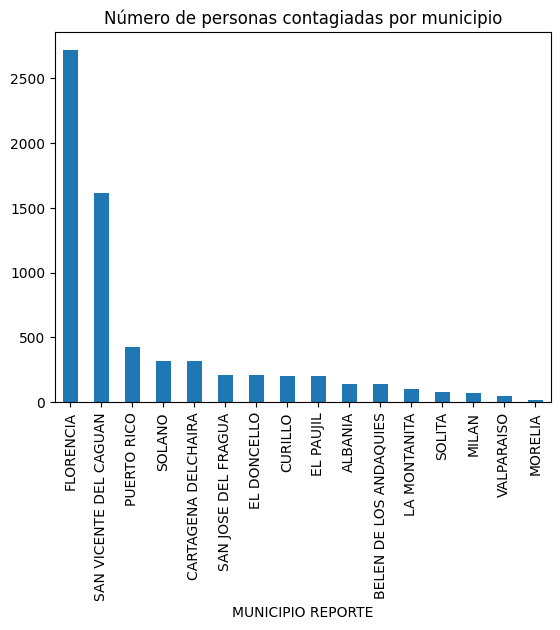


 Distribución de los casos por Año
FECHA REPORTE
2023    1948
2020    1931
2019    1246
2022    1104
2021     387
2018     189
Name: count, dtype: int64
FECHA REPORTE
2023    0.286260
2020    0.283762
2019    0.183101
2022    0.162234
2021    0.056870
2018    0.027774
Name: proportion, dtype: float64


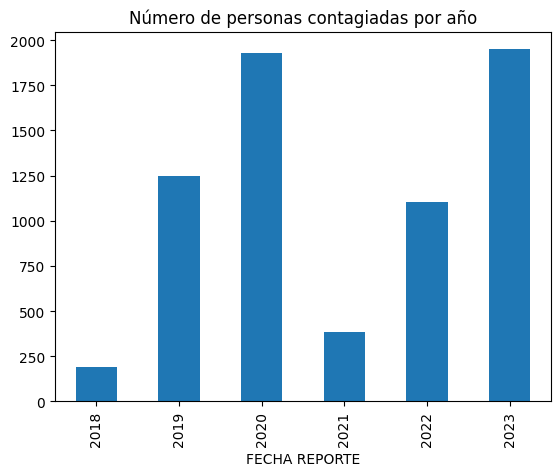


 Distribución de los casos por Mes
MES REPORTE
FEBRERO       849
MARZO         840
ENERO         835
ABRIL         750
MAYO          652
DICIEMBRE     546
JULIO         505
JUNIO         449
OCTUBRE       423
NOVIEMBRE     390
AGOSTO        311
SEPTIEMBRE    255
Name: count, dtype: int64
MES REPORTE
FEBRERO       0.124761
MARZO         0.123439
ENERO         0.122704
ABRIL         0.110213
MAYO          0.095812
DICIEMBRE     0.080235
JULIO         0.074210
JUNIO         0.065981
OCTUBRE       0.062160
NOVIEMBRE     0.057311
AGOSTO        0.045702
SEPTIEMBRE    0.037472
Name: proportion, dtype: float64


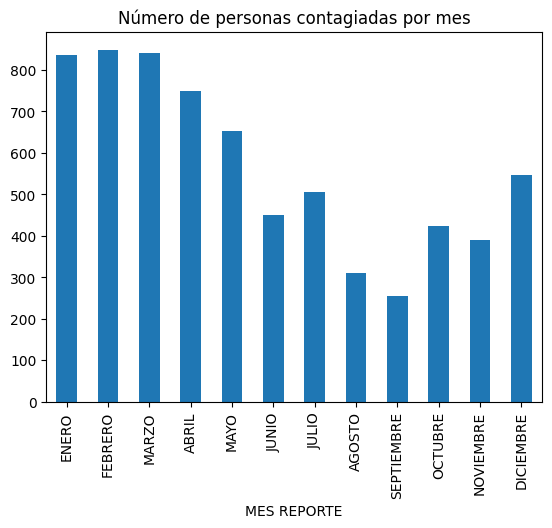

In [7]:
# Revisar la distribución de la muestra
print ("\n Distribución de los casos por Municipio")
print (dengue['MUNICIPIO REPORTE'].value_counts())
print (dengue['MUNICIPIO REPORTE'].value_counts(normalize=True))
dengue['MUNICIPIO REPORTE'].value_counts().plot(kind='bar',title='Número de personas contagiadas por municipio')
plt.show()
print ("\n Distribución de los casos por Año")
print (dengue['FECHA REPORTE'].value_counts())
print (dengue['FECHA REPORTE'].value_counts(normalize=True))
# Obtener los años únicos y ordenarlos de menor a mayor
anios_ordenados = sorted(dengue['FECHA REPORTE'].unique())
# Graficar los casos por año en orden
casos_dengue = dengue['FECHA REPORTE'].value_counts().reindex(anios_ordenados)
casos_dengue.plot(kind='bar', title='Número de personas contagiadas por año')
plt.show()
print ("\n Distribución de los casos por Mes")
print (dengue['MES REPORTE'].value_counts())
print (dengue['MES REPORTE'].value_counts(normalize=True))
# Ordenar los meses del año en español
meses_ordenados = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
dengue['MES REPORTE'].value_counts().reindex(meses_ordenados).plot(kind='bar', title='Número de personas contagiadas por mes')
plt.show()

Distribución de la muestra por rango de edad: 
EDAD
1-17      4321
18-29     1185
30-44      723
45-59      351
60-100     225
Name: count, dtype: int64


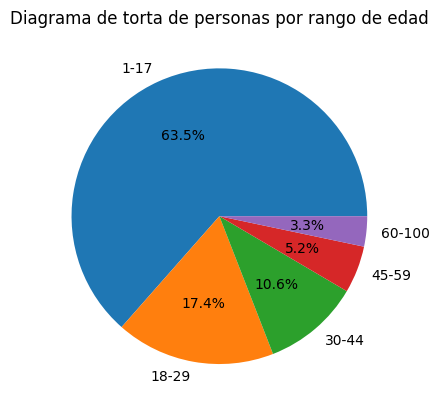

In [8]:
# Diagrama de distribución de edad de los contagiados con dengue
print ("Distribución de la muestra por rango de edad: ")
# Definir los rangos y etiquetas de edad
bins = [1, 18, 30, 45, 60, 100]
labels = ['1-17', '18-29', '30-44', '45-59', '60-100']

# Agrupar las edades en rangos
edades_rango = pd.cut(dengue['EDAD'], bins=bins, labels=labels, right=False)

# Mostrar el conteo de personas en cada grupo de edad
print(edades_rango.value_counts())

# Graficar la distribución por rango de edad
plt.figure()
edades_rango.value_counts().plot(kind="pie", labels=labels, title='Diagrama de torta de personas por rango de edad', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [9]:
# ===============================
# Procesar DENGUE conservando Mes 
# ===============================

# Normalizar columnas
dengue.columns = dengue.columns.str.strip()

# Mapeo de meses
meses_map = {
    'ENERO': 1, 'FEBRERO': 2, 'MARZO': 3, 'ABRIL': 4, 'MAYO': 5, 'JUNIO': 6,
    'JULIO': 7, 'AGOSTO': 8, 'SEPTIEMBRE': 9, 'OCTUBRE': 10, 'NOVIEMBRE': 11, 'DICIEMBRE': 12
}

# ---- Preparar dataframe base ----
df_dengue = dengue[['FECHA REPORTE', 'MES REPORTE', 'MUNICIPIO REPORTE', 'EDAD']].copy()
df_dengue['MES_NUM'] = df_dengue['MES REPORTE'].map(meses_map)
df_dengue['Fecha'] = pd.to_datetime(dict(year=df_dengue['FECHA REPORTE'], month=df_dengue['MES_NUM'], day=1))

# Crear todas las combinaciones posibles de municipio y fecha
fechas_completas = pd.date_range(start='2018-01-01', end='2023-12-01', freq='MS')
municipios = dengue['MUNICIPIO REPORTE'].unique()
idx = pd.MultiIndex.from_product([municipios, fechas_completas], names=['MUNICIPIO REPORTE', 'Fecha'])

# Reindexar y rellenar datos
df_dengue_group = (
    df_dengue.groupby(['MUNICIPIO REPORTE', 'Fecha'])
    .agg(
        Casos_Dengue=('EDAD', 'count')   # Conteo de casos
    )
    .reset_index()
)

# Rellenar Casos_Dengue con 0 donde no hay casos
df_dengue_group['Casos_Dengue'] = df_dengue_group['Casos_Dengue'].fillna(0).astype(int)

# Agregar columna "Mes" con nombre
df_dengue_group['Mes'] = df_dengue_group['Fecha'].dt.month.map({
    1: 'ENERO', 2: 'FEBRERO', 3: 'MARZO', 4: 'ABRIL', 5: 'MAYO', 6: 'JUNIO',
    7: 'JULIO', 8: 'AGOSTO', 9: 'SEPTIEMBRE', 10: 'OCTUBRE', 11: 'NOVIEMBRE', 12: 'DICIEMBRE'
})

print(df_dengue_group.head(15))


   MUNICIPIO REPORTE      Fecha  Casos_Dengue         Mes
0            ALBANIA 2019-04-01             2       ABRIL
1            ALBANIA 2019-05-01             2        MAYO
2            ALBANIA 2019-06-01             1       JUNIO
3            ALBANIA 2019-07-01             5       JULIO
4            ALBANIA 2019-08-01             5      AGOSTO
5            ALBANIA 2019-09-01             6  SEPTIEMBRE
6            ALBANIA 2019-10-01             6     OCTUBRE
7            ALBANIA 2019-11-01             7   NOVIEMBRE
8            ALBANIA 2019-12-01            18   DICIEMBRE
9            ALBANIA 2020-01-01            24       ENERO
10           ALBANIA 2020-02-01            13     FEBRERO
11           ALBANIA 2020-03-01            11       MARZO
12           ALBANIA 2020-04-01            10       ABRIL
13           ALBANIA 2020-05-01             3        MAYO
14           ALBANIA 2020-06-01             1       JUNIO


In [10]:
# =========================================
# Limpieza y verificación de los datos de lluvia
# # =========================================

# =========================================
# 1. Preparar fechas de referencia
# =========================================
fechas_completas = pd.date_range(start="2018-01-01", end="2023-12-01", freq="MS")

lluvia['Fecha'] = pd.to_datetime(lluvia['Fecha'], errors='coerce', dayfirst=True)
lluvia['Fecha'] = lluvia['Fecha'].dt.to_period('M').dt.to_timestamp()

# =========================================
# 2. Crear dataset de lluvia limpio por estación
# =========================================
lluvia_limpia = []

for estacion, df_estacion in lluvia.groupby("NombreEstacion"):
    df_estacion = (
        df_estacion.set_index("Fecha")
        .reindex(fechas_completas)
        .rename_axis("Fecha")
        .reset_index()
    )
    df_estacion["NombreEstacion"] = estacion
    
    # Reemplazar valores fuera de rango por NaN
    df_estacion["Valor"] = df_estacion["Valor"].mask(df_estacion["Valor"] < 30, np.nan)
    
    # Interpolación (sólo si no es MARACAIBO, se maneja después)
    if estacion != "MARACAIBO [4403000112]":
        df_estacion["Valor_interp"] = df_estacion["Valor"].interpolate(method="linear")
    else:
        df_estacion["Valor_interp"] = np.nan  # Se rellena más tarde con el promedio global
    
    lluvia_limpia.append(df_estacion)

lluvia_limpia = pd.concat(lluvia_limpia, ignore_index=True)

# =========================================
# 3. Calcular promedio global mensual (sin NaN ni ceros)
# =========================================
promedio_global = (
    lluvia_limpia.groupby("Fecha")["Valor_interp"]
    .mean()  
    .reset_index()
    .rename(columns={"Valor_interp": "PromedioGlobal"})
)

lluvia_limpia = lluvia_limpia.merge(promedio_global, on="Fecha", how="left")

# =========================================
# 4. Rellenar valores finales
# =========================================
# Caso especial: estación dañada "MARACAIBO [4403000112]" → siempre promedio global
lluvia_limpia.loc[
    lluvia_limpia["NombreEstacion"] == "MARACAIBO [4403000112]",
    "Valor_final"
] = lluvia_limpia.loc[
    lluvia_limpia["NombreEstacion"] == "MARACAIBO [4403000112]",
    "PromedioGlobal"
]

# Para las demás: usar interpolación primero, si aún falta, promedio global
lluvia_limpia["Valor_final"] = lluvia_limpia["Valor_interp"].fillna(lluvia_limpia["PromedioGlobal"])

# =========================================
# 5. Dataset final limpio
# =========================================
lluvia_final = lluvia_limpia[["NombreEstacion", "Fecha", "Valor_final"]].rename(columns={"Valor_final": "Lluvia_mm"})

# Verificación de los datos de lluvia
# Contar NaN totales en la columna Valor
total_nans = lluvia_final['Lluvia_mm'].isna().sum()
print(f"Total de NaN en 'Valor': {total_nans}")

# Contar NaN por estación
nans_por_estacion = lluvia_final[lluvia_final['Lluvia_mm'].isna()] \
    .groupby('NombreEstacion')['Lluvia_mm'] \
    .count()

print("\nNaN por Estación:")
print(nans_por_estacion)


Total de NaN en 'Valor': 0

NaN por Estación:
Series([], Name: Lluvia_mm, dtype: int64)


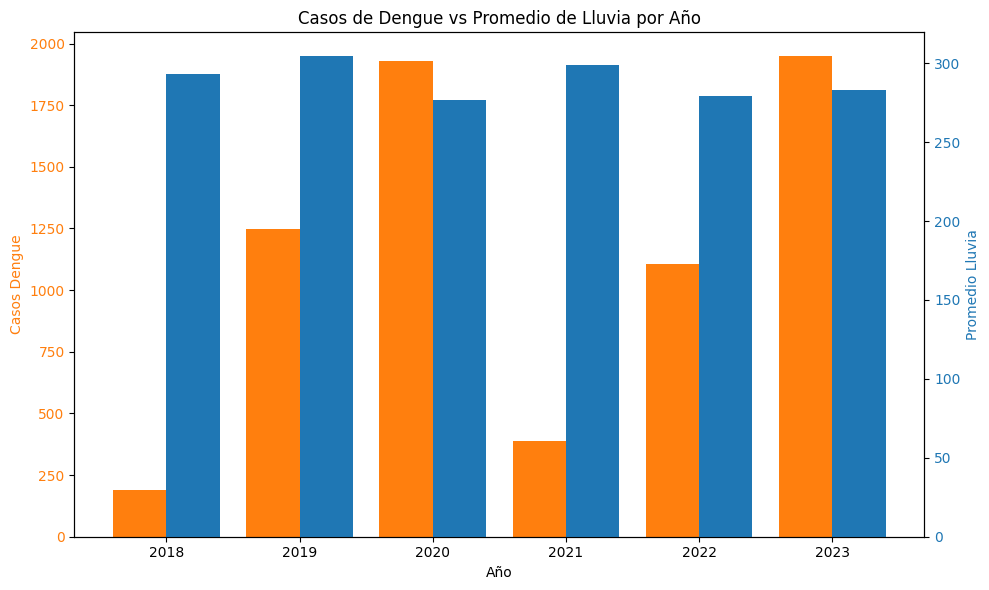


 Distribución de los casos por Mes


C:\Users\Fabian Perez\AppData\Local\Temp\ipykernel_3056\1477850559.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_meses.index, rotation=45)


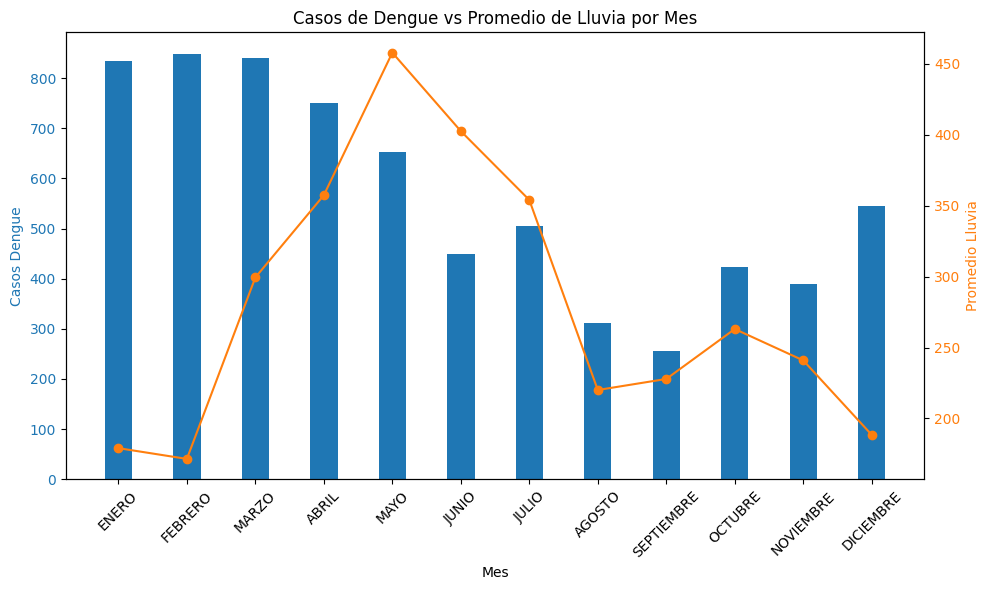

In [11]:
# Revisar la distribución de la muestra de lluvia 
# --- 2️⃣ Agrupar Lluvia por año ---
lluvia_final['Fecha'] = pd.to_datetime(lluvia_final['Fecha'], errors='coerce', dayfirst=True)
lluvia_final['Año'] = lluvia_final['Fecha'].dt.year
# Calcular promedio de lluvia por año
promedio_lluvia = lluvia_final.groupby('Año')['Lluvia_mm'].mean()

# --- 3️⃣ Unir ambos DataFrames ---
df_combinado = pd.DataFrame({
    'Casos Dengue': casos_dengue,
    'Promedio Lluvia': promedio_lluvia
}).sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel("Año")
ax1.set_ylabel("Casos Dengue", color="tab:orange")
ax1.bar(df_combinado.index - 0.2, df_combinado['Casos Dengue'], 
        width=0.4, color="tab:orange", label="Casos Dengue")
ax1.tick_params(axis='y', labelcolor="tab:orange")

# Eje Y derecho para promedio de lluvias
ax2 = ax1.twinx()
ax2.set_ylabel("Promedio Lluvia", color="tab:blue")
ax2.bar(df_combinado.index + 0.2, df_combinado['Promedio Lluvia'], 
        width=0.4, color="tab:blue", label="Promedio Lluvia")
ax2.tick_params(axis='y', labelcolor="tab:blue")

# Título y formato
plt.title("Casos de Dengue vs Promedio de Lluvia por Año")
fig.tight_layout()

# Mostrar
plt.show()

print ("\n Distribución de los casos por Mes")
# Ordenar los meses del año en español
meses_ordenados = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

# --- 1️⃣ Casos de dengue por mes ---
casos_dengue_mes = dengue['MES REPORTE'].value_counts().reindex(meses_ordenados)

# --- 2️⃣ Lluvias por mes ---
# Asegurar formato fecha
lluvia['Fecha'] = pd.to_datetime(lluvia['Fecha'], errors='coerce', dayfirst=True)
# Extraer mes en texto para alinear con dengue
lluvia['Mes'] = lluvia['Fecha'].dt.month.apply(lambda x: meses_ordenados[x-1])
# Calcular promedio de lluvia por mes
promedio_lluvia_mes = lluvia.groupby('Mes')['Valor'].mean().reindex(meses_ordenados)

# --- 3️⃣ Unir ambos DataFrames ---
df_meses = pd.DataFrame({
    'Casos Dengue': casos_dengue_mes,
    'Promedio Lluvia': promedio_lluvia_mes
})

# --- 4️⃣ Graficar con doble eje Y ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Casos de dengue (barras)
ax1.set_xlabel("Mes")
ax1.set_ylabel("Casos Dengue", color="tab:blue")
ax1.bar(df_meses.index, df_meses['Casos Dengue'], width=0.4, color="tab:blue", label="Casos Dengue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.set_xticklabels(df_meses.index, rotation=45)

# Promedio de lluvias (línea con puntos)
ax2 = ax1.twinx()
ax2.set_ylabel("Promedio Lluvia", color="tab:orange")
ax2.plot(df_meses.index, df_meses['Promedio Lluvia'], color="tab:orange", marker='o', label="Promedio Lluvia")
ax2.tick_params(axis='y', labelcolor="tab:orange")

plt.title("Casos de Dengue vs Promedio de Lluvia por Mes")
fig.tight_layout()
plt.show()


In [12]:
# =========================================
# 1. Normalizar fechas en ambos DataFrames
# =========================================
lluvia_final['Fecha'] = pd.to_datetime(lluvia_final['Fecha'], errors='coerce', dayfirst=True)
lluvia_final['Fecha'] = lluvia_final['Fecha'].dt.to_period('M').dt.to_timestamp()  # primer día de mes

df_dengue_group['Fecha'] = pd.to_datetime(df_dengue_group['Fecha'])
df_dengue_group['Fecha'] = df_dengue_group['Fecha'].dt.to_period('M').dt.to_timestamp()

# =========================================
# 2. Diccionario de relación Municipio ↔ Estaciones
# =========================================
mapa_municipio_estaciones = {
    'SOLANO': ['ARARACUARA [44135010]', 'CUEMANI [44140020]', 'ESTRECHOS LOS [44127010]'],
    'BELEN DE LOS ANDAQUIES': ['BELEN DE ANDAQUIES [44040020]'],
    'SAN JOSE DEL FRAGUA': ['BELEN DE ANDAQUIES [44040020]'],
    'CARTAGENA DELCHAIRA': ['CARTAGENA D CHAIRA [46040010]', 'CUEMANI [44140020]'],
    'SAN VICENTE DEL CAGUAN': ['CARTAGENA D CHAIRA [46040010]'],
    'FLORENCIA': ['CORDOBA [44100010]', 'MACAGUAL [44035030]'],
    'MORELIA': ['MACAGUAL [44035030]'],
    'LA MONTANITA': ['LARANDIA [44030060]'],
    'MILAN': ['LARANDIA [44030060]'],
    'EL DONCELLO': ['MAGUARE - AUT [46035010]'],
    'EL PAUJIL': ['MAGUARE - AUT [46035010]'],
    'PUERTO RICO': ['MAGUARE - AUT [46035010]'],
    'ALBANIA': ['MARACAIBO [4403000112]'],
    'VALPARAISO': ['MARACAIBO [4403000112]'],
    'CURILLO': ['MARACAIBO [4403000112]'],
    'SOLITA': ['ESTRECHOS LOS [44127010]'],
}

# =========================================
# 3. Agrupar lluvia por estación y mes
# =========================================
lluvia_group = (
    lluvia_final.groupby(['NombreEstacion', 'Fecha'])['Lluvia_mm']
    .mean()
    .reset_index()
)

# =========================================
# 4. Calcular promedio de lluvia por municipio y mes
# =========================================
lista_resultados = []

for municipio, estaciones in mapa_municipio_estaciones.items():
    df_estaciones = lluvia_group[lluvia_group['NombreEstacion'].isin(estaciones)]
    
    # Promedio entre estaciones del municipio
    df_promedio = (
        df_estaciones.groupby('Fecha')['Lluvia_mm']
        .mean()
        .reset_index()
    )
    df_promedio['MUNICIPIO REPORTE'] = municipio
    lista_resultados.append(df_promedio)

# Unir todos los municipios en un solo DataFrame
df_lluvia_municipio = pd.concat(lista_resultados, ignore_index=True)

# =========================================
# 5. Unir con df_dengue_group
# =========================================
df_final = pd.merge(
    df_dengue_group,
    df_lluvia_municipio,
    how='left',
    left_on=['MUNICIPIO REPORTE', 'Fecha'],
    right_on=['MUNICIPIO REPORTE', 'Fecha']
)

df_final.rename(columns={'Valor': 'Lluvia_mm'}, inplace=True)

print(df_final.head(20))


   MUNICIPIO REPORTE      Fecha  Casos_Dengue         Mes   Lluvia_mm
0            ALBANIA 2019-04-01             2       ABRIL  310.933333
1            ALBANIA 2019-05-01             2        MAYO  395.222222
2            ALBANIA 2019-06-01             1       JUNIO  475.855556
3            ALBANIA 2019-07-01             5       JULIO  339.480556
4            ALBANIA 2019-08-01             5      AGOSTO  203.205556
5            ALBANIA 2019-09-01             6  SEPTIEMBRE  257.797222
6            ALBANIA 2019-10-01             6     OCTUBRE  278.277778
7            ALBANIA 2019-11-01             7   NOVIEMBRE  290.655556
8            ALBANIA 2019-12-01            18   DICIEMBRE  268.633333
9            ALBANIA 2020-01-01            24       ENERO  148.533333
10           ALBANIA 2020-02-01            13     FEBRERO  203.470370
11           ALBANIA 2020-03-01            11       MARZO  235.885185
12           ALBANIA 2020-04-01            10       ABRIL  294.900000
13           ALBANIA

In [13]:
# Contar NaN totales en la columna Lluvia_mm
total_nans = df_final['Lluvia_mm'].isna().sum()
print(f"Total de NaN en 'Lluvia_mm': {total_nans}")

# Contar NaN por municipio
nans_por_municipio = df_final[df_final['Lluvia_mm'].isna()] \
    .groupby('MUNICIPIO REPORTE')['Lluvia_mm'] \
    .count()

print("\nNaN por municipio:")
print(nans_por_municipio)


Total de NaN en 'Lluvia_mm': 0

NaN por municipio:
Series([], Name: Lluvia_mm, dtype: int64)


In [14]:
# Agregar la población de cada municipio para su análisis
# Diccionario de población adaptado a los nombres de df_final
poblacion_municipios = {
    "ALBANIA": 6432,
    "BELEN DE LOS ANDAQUIES": 11601,
    "CARTAGENA DELCHAIRA": 33908, 
    "CURILLO": 11737,
    "EL DONCELLO": 22183,
    "EL PAUJIL": 20528,
    "FLORENCIA": 175395,
    "LA MONTANITA": 23789,
    "MILAN": 11774,
    "MORELIA": 3836,
    "PUERTO RICO": 33447,
    "SAN JOSE DEL FRAGUA": 15029,
    "SAN VICENTE DEL CAGUAN": 69214,
    "SOLANO": 24131,
    "SOLITA": 9143,
    "VALPARAISO": 11687
}

# Agregar columna 'Poblacion' al df_final
df_final["Poblacion"] = df_final["MUNICIPIO REPORTE"].map(poblacion_municipios)

# Verificar: ver municipios únicos con su población
print(df_final[["MUNICIPIO REPORTE", "Poblacion"]].drop_duplicates())


          MUNICIPIO REPORTE  Poblacion
0                   ALBANIA       6432
33   BELEN DE LOS ANDAQUIES      11601
69      CARTAGENA DELCHAIRA      33908
120                 CURILLO      11737
159             EL DONCELLO      22183
200               EL PAUJIL      20528
238               FLORENCIA     175395
309            LA MONTANITA      23789
344                   MILAN      11774
366                 MORELIA       3836
378             PUERTO RICO      33447
434     SAN JOSE DEL FRAGUA      15029
484  SAN VICENTE DEL CAGUAN      69214
556                  SOLANO      24131
597                  SOLITA       9143
623              VALPARAISO      11687


In [15]:
temp =  pd.read_csv('Temperatura.csv',sep=None, engine='python', encoding='latin-1', on_bad_lines='skip')
print(lluvia.head())

# Aseguramos que las fechas estén en formato datetime
temp['Fecha'] = pd.to_datetime(temp['Fecha'])
df_final['Fecha'] = pd.to_datetime(df_final['Fecha'])

# Extraer número de mes en ambos DataFrames
temp['Mes_Num'] = temp['Fecha'].dt.month
df_final['Mes_Num'] = df_final['Fecha'].dt.month

# Calcular promedio mensual en temp (agrupado por Mes_Num)
promedios_temp = (
    temp.groupby('Mes_Num')["Valor"]  # reemplaza "Valor" por el nombre real de la columna de temperatura en temp
    .mean()
    .reset_index()
    .rename(columns={"Valor": "Temperatura"})
)

# Hacer el merge con df_final
df_final = df_final.merge(promedios_temp, on='Mes_Num', how='left')

# Opcional: si ya no necesitas Mes_Num puedes borrarla
# df_final.drop(columns=['Mes_Num'], inplace=True)

print(df_final.head())

   CodigoEstacion         NombreEstacion       Variable  \
0        44135010  ARARACUARA [44135010]  PRECIPITACION   
1        44135010  ARARACUARA [44135010]  PRECIPITACION   
2        44135010  ARARACUARA [44135010]  PRECIPITACION   
3        44135010  ARARACUARA [44135010]  PRECIPITACION   
4        44135010  ARARACUARA [44135010]  PRECIPITACION   

                     Parametro      Fecha Unidad  Valor NivelAprobacion  \
0  Precipitacion total mensual 2018-01-01     mm  241.3      Definitivo   
1  Precipitacion total mensual 2018-02-01     mm   62.1      Definitivo   
2  Precipitacion total mensual 2018-03-01     mm  356.6      Definitivo   
3  Precipitacion total mensual 2018-04-01     mm  394.4      Definitivo   
4  Precipitacion total mensual 2018-05-01     mm  483.8      Definitivo   

       Mes  
0    ENERO  
1  FEBRERO  
2    MARZO  
3    ABRIL  
4     MAYO  
  MUNICIPIO REPORTE      Fecha  Casos_Dengue     Mes   Lluvia_mm  Poblacion  \
0           ALBANIA 2019-04-01       

In [16]:
# Contar NaN totales en la columna Temperatura
total_nans = df_final['Temperatura'].isna().sum()
print(f"Total de NaN en Temperatura': {total_nans}")

# Contar NaN por municipio
nans_por_municipio = df_final[df_final['Temperatura'].isna()] \
    .groupby('MUNICIPIO REPORTE')['Temperatura'] \
    .count()

print("\nNaN por municipio:")
print(nans_por_municipio)

Total de NaN en Temperatura': 0

NaN por municipio:
Series([], Name: Temperatura, dtype: int64)


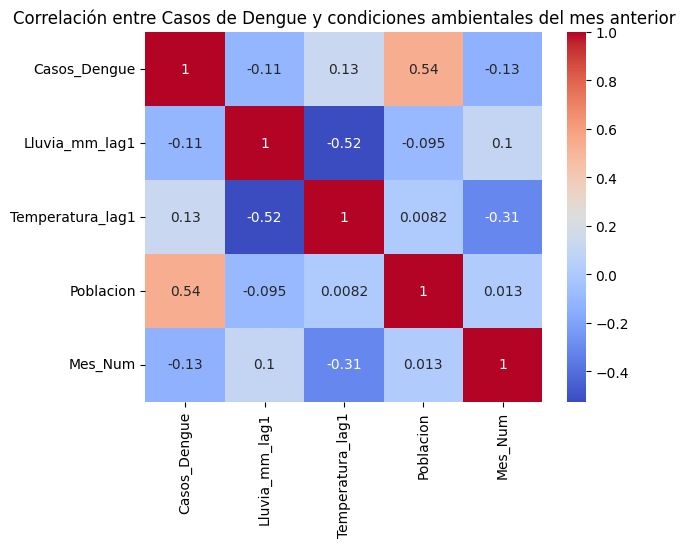

In [17]:
# Crear variables con rezago de 1 mes por municipio
df_final = df_final.sort_values(["MUNICIPIO REPORTE", "Fecha"])

def lag_circular(x):
    shifted = x.shift(1)
    # Reemplazar el primer NaN con el último valor disponible (diciembre 2023)
    shifted.iloc[0] = x.iloc[-1]
    return shifted

df_final["Lluvia_mm_lag1"] = df_final.groupby("MUNICIPIO REPORTE")["Lluvia_mm"].transform(lag_circular)
df_final["Temperatura_lag1"] = df_final.groupby("MUNICIPIO REPORTE")["Temperatura"].transform(lag_circular)

# Matriz de correlación con los valores del mes anterior
correlacion_matriz = df_final[['Casos_Dengue', 'Lluvia_mm_lag1', 'Temperatura_lag1', 'Poblacion', 'Mes_Num']].corr()

# Graficar el mapa de calor
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm')
plt.title('Correlación entre Casos de Dengue y condiciones ambientales del mes anterior')
plt.show()